# (1). Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

In [ ]:
df = pd.read_csv('sf_library.csv')
df

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered,Unnamed: 11,Unnamed: 12
0,0,Adult,838,382,55 to 59 years,r3,Richmond,Jun,2023.0,True,2003,NaN,NaN
1,0,Adult,1,0,25 to 34 years,r3,Richmond,Jun,2023.0,True,2017,NaN,NaN
2,0,Adult,1007,528,60 to 64 years,s7,Sunset,Jul,2022.0,True,2003,NaN,NaN
3,0,Adult,4806,3981,45 to 54 years,m6,Mission,Jun,2023.0,True,2003,NaN,NaN
4,3,Senior,46,27,65 to 74 years,m6,Mission,May,2023.0,True,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63988,0,Adult,0,0,25 to 34 years,s7,Sunset,Jul,2023.0,True,2023,NaN,NaN
63989,2,Teen,424,37,10 to 19 years,s7,Sunset,Jul,2023.0,True,2011,NaN,NaN
63990,0,Adult,393,13,10 to 19 years,s7,Sunset,Apr,2022.0,True,2004,NaN,NaN
63991,0,Adult,1140,545,10 to 19 years,s7,Sunset,Apr,2021.0,True,2008,NaN,NaN


# Process Age Range column

In [ ]:
'''
parse to get min and max of age range
and then find the avg of the 2
if age range only have 1 then use that
'''
pattern = re.compile(r'\d+')
for i, val in enumerate(df.loc[:, 'Age Range']):
  rang = pattern.findall(str(val))
  l = len(rang)
  if l == 2:
    df.at[i, 'Age Range'] = (int(rang[0]) + int(rang[1])) / 2
  elif l == 1:
    df.at[i, 'Age Range'] = rang[0]
  elif l == 0:
    df.at[i, 'Age Range'] = -1

In [ ]:
df.loc[:, 'Age Range'].value_counts(dropna=False)

,count
Age Range,
29.5,12628
39.5,12152
14.5,10982
49.5,7391
69.5,5213
22.0,3616
4.5,3495
75,3262
57.0,2754


In [ ]:
# there only 4 type of patron
df.loc[:, 'Patron Type Code'].value_counts(dropna=False), df.loc[:, 'Patron Type Definition'].value_counts(dropna=False)

(Patron Type Code
 0    41938
 3     8405
 1     6849
 2     6801
 Name: count, dtype: int64,
 Patron Type Definition
 Adult       41938
 Senior       8405
 Juvenile     6849
 Teen         6801
 Name: count, dtype: int64)

In [ ]:
'''
make a dict out of patron type code and patron type definition
'''
patron_dict = { 'Adult' : 0,
                'Juvenile' : 1,
                'Teen' : 2,
                'Senior' : 3
              }

In [ ]:
'''
find out what is the avg age for each patron type
'''
# adult
adult_age_list = []
# juvenile
juvenile_age_list = []
# teen
teen_age_list = []
# Senior
senior_age_list = []

In [ ]:
for i in range(df.shape[0]):
  # take out patron type with the age avg respectively
  patron_type, age_avg = df.at[i, 'Patron Type Code'], df.at[i, 'Age Range']
  if age_avg != -1:
    if patron_type == patron_dict['Adult']:
      adult_age_list += [age_avg]
    elif patron_type == patron_dict['Juvenile']:
      juvenile_age_list += [age_avg]
    elif patron_type == patron_dict['Teen']:
      teen_age_list += [age_avg]
    elif patron_type == patron_dict['Senior']:
      senior_age_list += [age_avg]

In [ ]:
mean_age_adult = np.mean(list(map(lambda x : float(x), adult_age_list)))
mean_age_juvenile = np.mean(list(map(lambda x : float(x), juvenile_age_list)))
mean_age_teen = np.mean(list(map(lambda x : float(x), teen_age_list)))
mean_age_senior = np.mean(list(map(lambda x : float(x), senior_age_list)))

In [ ]:
mean_age_adult, mean_age_juvenile, mean_age_teen, mean_age_senior

(38.77561778456254, 9.40946261682243, 14.49852854620365, 71.6248810090433)

In [ ]:
'''
fill in the missing value cell with the avg of the respect patron age
'''
for i in range(df.shape[0]):
  # take out patron type with the age avg respectively
  patron_type, age_avg, missing_value = df.at[i, 'Patron Type Code'], df.at[i, 'Age Range'], 0
  if age_avg == -1:
    if patron_type == patron_dict['Adult']:
      missing_value = mean_age_adult
    elif patron_type == patron_dict['Juvenile']:
      missing_value = mean_age_juvenile
    elif patron_type == patron_dict['Teen']:
      missing_value = mean_age_teen
    elif patron_type == patron_dict['Senior']:
      missing_value = mean_age_senior
    df.at[i, 'Age Range'] = missing_value

In [ ]:
df.loc[:, 'Age Range'].value_counts(dropna=False)

,count
Age Range,
29.5,12628
39.5,12152
14.5,10982
49.5,7391
69.5,5213
22.0,3616
4.5,3495
75,3262
57.0,2754


# Process home library columns

In [ ]:
df.loc[:, 'Home Library Definition'].value_counts(dropna=False)

,count
Home Library Definition,
Richmond,20206
Mission,17843
Sunset,13862
Chinatown,12082


In [ ]:
df.loc[:, 'Home Library Code'].value_counts(dropna=False)

,count
Home Library Code,
r3,20200
m6,17836
s7,13851
c2,12072
c2aaa,10
s7j,8
m6aaa,4
r3aaa,4
s7aaa,3


In [ ]:
df = pd.get_dummies(df, columns=['Home Library Definition'])

In [ ]:
df = df.drop(['Home Library Code'], axis=1)

# Process Circulation Active Month, Year

In [ ]:
df['Circulation Active Month'].value_counts(dropna=False)

,count
Circulation Active Month,
Jul,23961
Jun,7042
May,5068
Apr,3753
Mar,3577
Jan,3175
Feb,3017
Dec,2616
NaN,2540


In [ ]:
li = [7, 6, 5, 4, 3, 1, 2, 12, 0, 10, 9, 11, 8]
dict_circulation = {k : v for k, v in zip(df['Circulation Active Month'].value_counts(dropna=False).index,li)}

In [ ]:
dict_circulation

{'Jul': 7,
 'Jun': 6,
 'May': 5,
 'Apr': 4,
 'Mar': 3,
 'Jan': 1,
 'Feb': 2,
 'Dec': 12,
 nan: 0,
 'Oct': 10,
 'Sep': 9,
 'Nov': 11,
 'Aug': 8}

In [ ]:
'''
replace the month with number
'''
df['Circulation Active Month'] = df['Circulation Active Month'].replace(dict_circulation)

<ipython-input-20-159fcae19095>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Circulation Active Month'] = df['Circulation Active Month'].replace(dict_circulation)


In [ ]:
'''
fill missing value for circulation active year with -1
# '''
df['Circulation Active Year'] = df['Circulation Active Year'].fillna(2000)

In [ ]:
'''
strip off redundant columns
'''
# Check if the columns exist before dropping them
columns_to_drop = ['Patron Type Definition']
for col in ['Unnamed: 11', 'Unnamed: 12']:
  if col in df.columns:
    columns_to_drop.append(col)

df = df.drop(columns_to_drop, axis=1)

# Remove duplicated row

In [ ]:
'''
find duplicated row
'''
df[df.duplicated()]

,Patron Type Code,Total Checkouts,Total Renewals,Age Range,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered,Home Library Definition_Chinatown,Home Library Definition_Mission,Home Library Definition_Richmond,Home Library Definition_Sunset
8,2,0,0,14.5,0,2000.0,True,2023,True,False,False,False
51,0,0,0,29.5,0,2000.0,True,2022,False,True,False,False
56,0,0,0,39.5,0,2000.0,True,2022,True,False,False,False
84,0,0,0,39.5,7,2023.0,True,2022,False,True,False,False
90,0,0,0,29.5,7,2023.0,True,2022,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
63971,0,0,0,29.5,4,2023.0,True,2022,False,False,True,False
63974,3,0,0,75,0,2000.0,False,2023,False,False,True,False
63976,0,0,0,49.5,7,2023.0,True,2018,False,False,False,True
63985,0,0,0,39.5,11,2022.0,True,2020,False,False,False,True


In [ ]:
'''
remove all duplicated row
'''
df_no_dup = df.drop_duplicates()
df_no_dup

,Patron Type Code,Total Checkouts,Total Renewals,Age Range,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered,Home Library Definition_Chinatown,Home Library Definition_Mission,Home Library Definition_Richmond,Home Library Definition_Sunset
0,0,838,382,57.0,6,2023.0,True,2003,False,False,True,False
1,0,1,0,29.5,6,2023.0,True,2017,False,False,True,False
2,0,1007,528,62.0,7,2022.0,True,2003,False,False,False,True
3,0,4806,3981,49.5,6,2023.0,True,2003,False,True,False,False
4,3,46,27,69.5,5,2023.0,True,2019,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
63987,0,16,16,57.0,7,2023.0,True,2022,False,False,False,True
63989,2,424,37,14.5,7,2023.0,True,2011,False,False,False,True
63990,0,393,13,14.5,4,2022.0,True,2004,False,False,False,True
63991,0,1140,545,14.5,4,2021.0,True,2008,False,False,False,True


## sf_lirary_cleaned_data

In [ ]:
df_no_dup.to_csv('sf_library_cleaned_data.csv', index=False)

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_no_dup, test_size=0.2, random_state=42)


Splitting data

In [ ]:
test_df

,Patron Type Code,Total Checkouts,Total Renewals,Age Range,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered,Home Library Definition_Chinatown,Home Library Definition_Mission,Home Library Definition_Richmond,Home Library Definition_Sunset
50140,3,10,5,69.5,3,2021.0,True,2013,False,False,False,True
6652,2,585,98,14.5,7,2023.0,True,2012,True,False,False,False
21517,0,199,316,39.5,7,2023.0,True,2017,False,True,False,False
33957,0,1,2,39.5,7,2023.0,True,2017,False,False,True,False
9078,2,69,4,14.5,11,2018.0,True,2012,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
50681,2,205,102,14.5,5,2023.0,True,2007,False,False,False,True
7910,1,113,22,14.5,6,2021.0,True,2014,True,False,False,False
55258,0,60,32,49.5,7,2023.0,True,2022,True,False,False,False
7645,0,3,4,29.5,8,2021.0,True,2020,True,False,False,False


In [ ]:
train_df

,Patron Type Code,Total Checkouts,Total Renewals,Age Range,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered,Home Library Definition_Chinatown,Home Library Definition_Mission,Home Library Definition_Richmond,Home Library Definition_Sunset
56043,1,30,60,4.5,6,2022.0,True,2022,True,False,False,False
40338,0,245,139,49.5,12,2021.0,True,2003,False,False,True,False
50229,0,11,13,29.5,4,2022.0,True,2021,False,False,False,True
55709,2,378,8,14.5,5,2019.0,True,2008,False,False,False,True
10143,3,412,169,69.5,6,2023.0,True,2003,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
51026,0,8,17,39.5,7,2023.0,True,2023,False,False,False,True
62504,3,0,0,69.5,2,2019.0,True,2015,False,False,True,False
43189,0,5,9,29.5,3,2023.0,True,2019,False,False,False,True
946,0,3,7,39.5,3,2022.0,True,2020,False,False,True,False


# (2). Data Exploration:



In [ ]:
"Take a first look the sf_library dataset after cleaning"
data_cleaned = train_df # pd.read_csv('sf_library_cleaned_data.csv')
data_cleaned.head()

,Patron Type Code,Total Checkouts,Total Renewals,Age Range,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered,Home Library Definition_Chinatown,Home Library Definition_Mission,Home Library Definition_Richmond,Home Library Definition_Sunset
56043,1,30,60,4.5,6,2022.0,True,2022,True,False,False,False
40338,0,245,139,49.5,12,2021.0,True,2003,False,False,True,False
50229,0,11,13,29.5,4,2022.0,True,2021,False,False,False,True
55709,2,378,8,14.5,5,2019.0,True,2008,False,False,False,True
10143,3,412,169,69.5,6,2023.0,True,2003,False,True,False,False


### How much data it there and what data do I have to work with?

In [ ]:
data_cleaned.shape

(44126, 12)

In [ ]:
# What are the types of data do we have to work with?
data_cleaned.dtypes

,0
Patron Type Code,int64
Total Checkouts,int64
Total Renewals,int64
Age Range,object
Circulation Active Month,int64
Circulation Active Year,float64
Provided Email Address,bool
Year Patron Registered,int64
Home Library Definition_Chinatown,bool
Home Library Definition_Mission,bool


In [ ]:
"check null"
data_cleaned.isnull().sum()

,0
Patron Type Code,0
Total Checkouts,0
Total Renewals,0
Age Range,0
Circulation Active Month,0
Circulation Active Year,0
Provided Email Address,0
Year Patron Registered,0
Home Library Definition_Chinatown,0
Home Library Definition_Mission,0


In [ ]:
"Statistics the dataSF"
data_cleaned.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Circulation Active Month,Circulation Active Year,Year Patron Registered
count,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000
mean,0.769841,280.133232,125.881793,6.266124,2004.074786,2012.804673
std,1.117591,719.652830,376.082643,2.738755,190.081800,6.289322
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,2003.000000
25%,0.000000,7.000000,2.000000,5.000000,2022.000000,2008.000000
50%,0.000000,46.000000,18.000000,7.000000,2023.000000,2014.000000
75%,2.000000,234.000000,89.000000,7.000000,2023.000000,2018.000000
max,3.000000,33122.000000,9511.000000,12.000000,2023.000000,2023.000000


In [ ]:
# Chuyển đổi Age  từ float64 sang int64
data_cleaned['Age Range'] = data_cleaned['Age Range'].astype('int64')
# Chuyển đổi Circulation Active Year từ float64 sang int64
data_cleaned['Circulation Active Year'] = data_cleaned['Circulation Active Year'].astype('int64')
data_cleaned.dtypes



,0
Patron Type Code,int64
Total Checkouts,int64
Total Renewals,int64
Age Range,int64
Circulation Active Month,int64
Circulation Active Year,int64
Provided Email Address,bool
Year Patron Registered,int64
Home Library Definition_Chinatown,bool
Home Library Definition_Mission,bool


# Visualizing the data to anwser these question:
## 1. Who really uses the library?
To answer this question, we can perform data analysis and visualization to identify the most frequent library users based on factors such as age range, patron type code, and activities like total checkouts.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

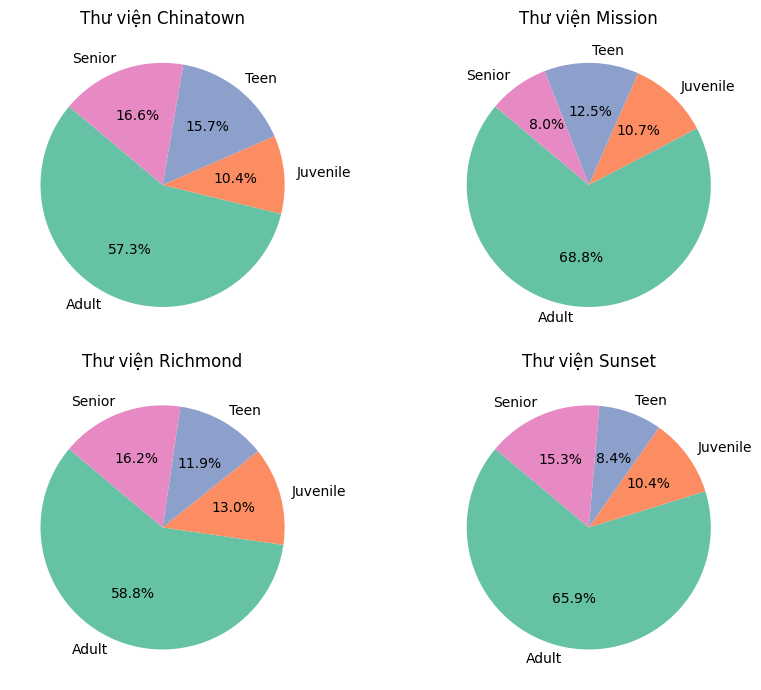

In [ ]:
# Tổng số người dùng theo loại tại từng thư viện
library_user_counts = {
    'Chinatown': data_cleaned.groupby('Patron Type Code')['Home Library Definition_Chinatown'].sum(),
    'Mission': data_cleaned.groupby('Patron Type Code')['Home Library Definition_Mission'].sum(),
    'Richmond': data_cleaned.groupby('Patron Type Code')['Home Library Definition_Richmond'].sum(),
    'Sunset': data_cleaned.groupby('Patron Type Code')['Home Library Definition_Sunset'].sum(),
}

# Thiết lập khung hình gồm 4 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

# Ánh xạ thư viện vào từng trục
libraries = list(library_user_counts.keys())
patron_labels = ['Adult', 'Juvenile', 'Teen', 'Senior']

for ax, library in zip(axes.flatten(), libraries):
    counts = library_user_counts[library]
    ax.pie(counts, labels=patron_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    ax.set_title(f'Thư viện {library}')

# Tinh chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()


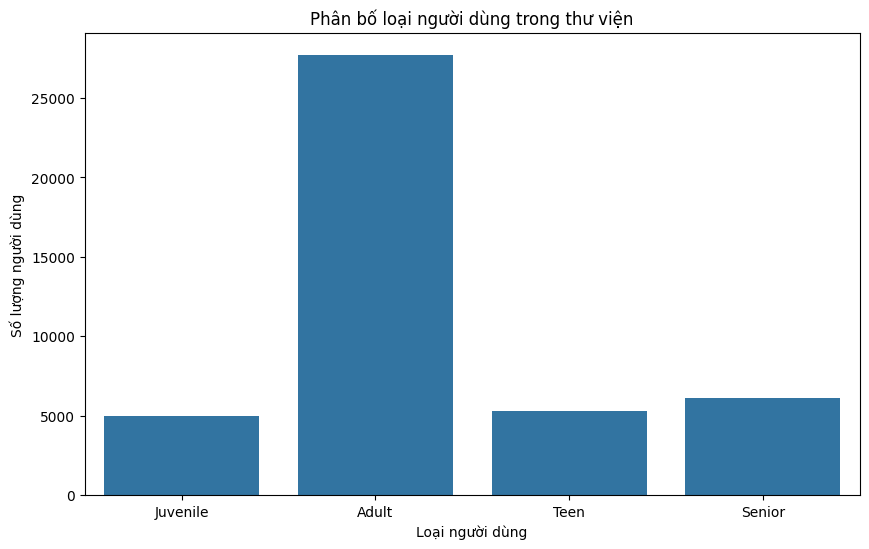

In [ ]:
""" A patron type code distribution plot will analyze the number of users for each patron type """

# Ánh xạ các giá trị mã hóa nhãn sang tên người dùng
patron_type_map = {0: 'Adult', 1: 'Juvenile', 2: 'Teen', 3: 'Senior'}

# Áp dụng ánh xạ vào cột 'Patron Type Code'
data_cleaned['Patron Type Code'] = data_cleaned['Patron Type Code'].map(patron_type_map)
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='Patron Type Code')  # Loại bỏ palette nếu không dùng hue
plt.title('Phân bố loại người dùng trong thư viện')
plt.xlabel('Loại người dùng')
plt.ylabel('Số lượng người dùng')
plt.show()


From this graph I conclude the thing:
"The data suggests that adults are the primary users of the library, followed by seniors. Teen and juvenile users constitute a smaller portion of the library's user base."

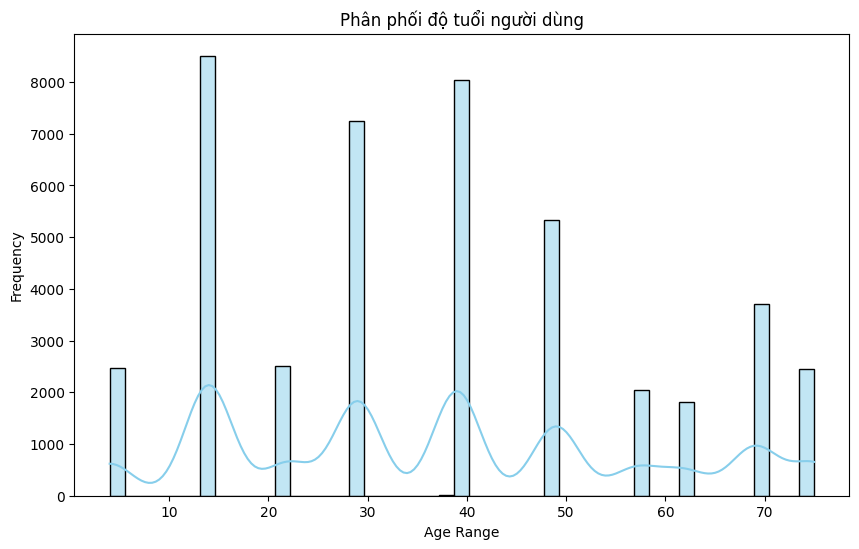

In [ ]:
"An age range distribution plot will show which age group uses the library the most."
"Vẽ lại cho không confuse 2 cái đường và cột"
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Age Range'], kde=True, color='skyblue')
plt.title('Phân phối độ tuổi người dùng')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.show()

The majority of users fall within the age range of 20-40, reflecting that the aged of adults tend to use the library the most.
Other age groups, such as children and seniors, account for a smaller proportion. This graph is also reflect the correlation with patron type code distribution plot.

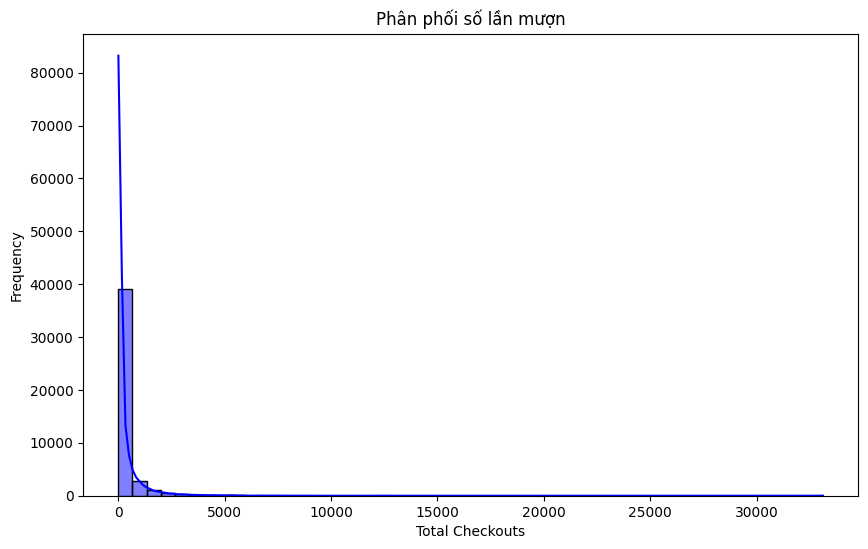

In [ ]:
"""A total checkouts plot will show which users have borrowed the most books,
 indicating who is actively using the library."""
 # Vẽ biểu đồ phân phối số lần mượn
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Total Checkouts'], kde=True, color='blue', bins=50)
plt.title('Phân phối số lần mượn')
plt.xlabel('Total Checkouts')
plt.ylabel('Frequency')
plt.show()


According to this graph, The majority of users have a very low number of book checkouts, mostly concentrated near zero. This indicates that most users borrow books infrequently or very rarely.
The number of users who borrow books multiple times decreases gradually, and it is rare to find users with an extremely high number of checkouts, forming a distinctly right-skewed distribution.

### Based on the analysis of the three graphs:

To answer the question Who really uses the library?
The library is primarily used by adults, particularly those aged between 20 and 40. This demographic represents the majority of library users, as reflected in both age range and patron type distributions. Seniors also contribute significantly, although to a lesser extent, while juveniles and teens make up a smaller portion of the user base. Additionally, the majority of users borrow books infrequently or very rarely, with only a small subset actively engaging in frequent checkouts.

## 2. Which library branch gets the most activity?
To answer this question, we can use columns describing the library branch (Home Library Definition_*), where users belong (Chinatown, Mission, Richmond, Sunset). A distribution plot based on home library (Home Library Definition_Chinatown, Home Library Definition_Mission, Home Library Definition_Richmond, Home Library Definition_Sunset) will help you see which branch has the most activity."

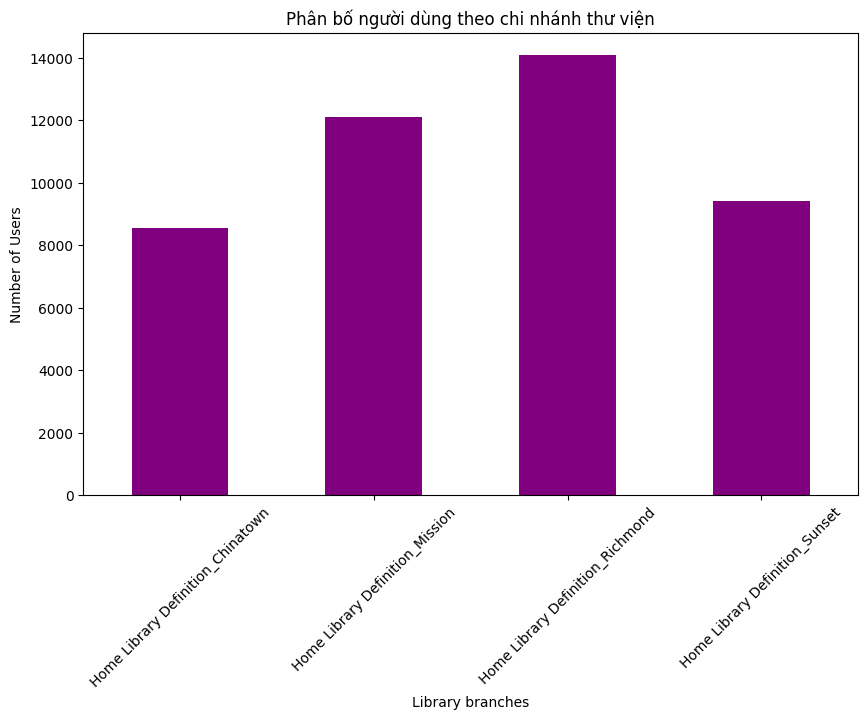

In [ ]:
# Vẽ biểu đồ phân bố người dùng theo các chi nhánh thư viện

home_lib_columns = ['Home Library Definition_Chinatown', 'Home Library Definition_Mission',
                    'Home Library Definition_Richmond', 'Home Library Definition_Sunset']

home_lib_data = data_cleaned[home_lib_columns].sum()

plt.figure(figsize=(10,6))
home_lib_data.plot(kind='bar', color='purple')
plt.title('Phân bố người dùng theo chi nhánh thư viện')
plt.xlabel('Library branches')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


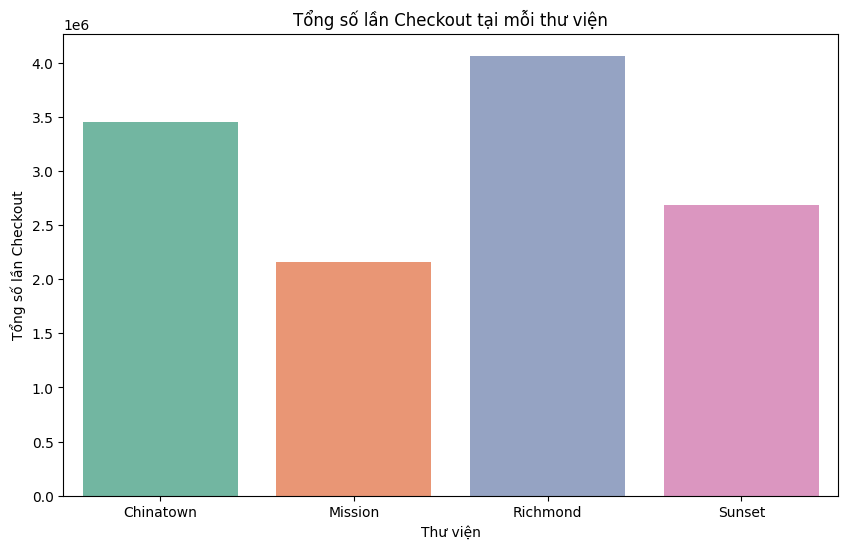

In [ ]:
# Tính tổng số lần checkout tại mỗi thư viện
library_checkouts = {
    'Chinatown': data_cleaned.loc[data_cleaned['Home Library Definition_Chinatown'], 'Total Checkouts'].sum(),
    'Mission': data_cleaned.loc[data_cleaned['Home Library Definition_Mission'], 'Total Checkouts'].sum(),
    'Richmond': data_cleaned.loc[data_cleaned['Home Library Definition_Richmond'], 'Total Checkouts'].sum(),
    'Sunset': data_cleaned.loc[data_cleaned['Home Library Definition_Sunset'], 'Total Checkouts'].sum(),
}

# Tạo DataFrame từ kết quả
library_checkouts_df = pd.DataFrame(list(library_checkouts.items()), columns=['Library Branch', 'Total Checkouts'])

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.barplot(data=library_checkouts_df,
            x='Library Branch', y='Total Checkouts',
            hue='Library Branch', palette='Set2', legend=False)
plt.title('Tổng số lần Checkout tại mỗi thư viện')
plt.xlabel('Thư viện')
plt.ylabel('Tổng số lần Checkout')
plt.show()


## Conclusion for these 2 charts:

The Richmond branch has the highest number of users and total checkouts as well, indicating it is the most active library branch among the four analyzed. The Mission branch follows closely behind, while the Chinatown and Sunset branches have relatively fewer users. This distribution suggests that Richmond and Mission branches are likely the central hubs of library activity, possibly due to their location, facilities, or services provided.

# (3): Machine Learning

## 3. Can you predict patron type?
By analyzing factors such as total checkouts, renewals, age, and home library, we can potentially classify patrons into different types. Correlation analysis will reveal the strength of relationships between these variables and patron type."

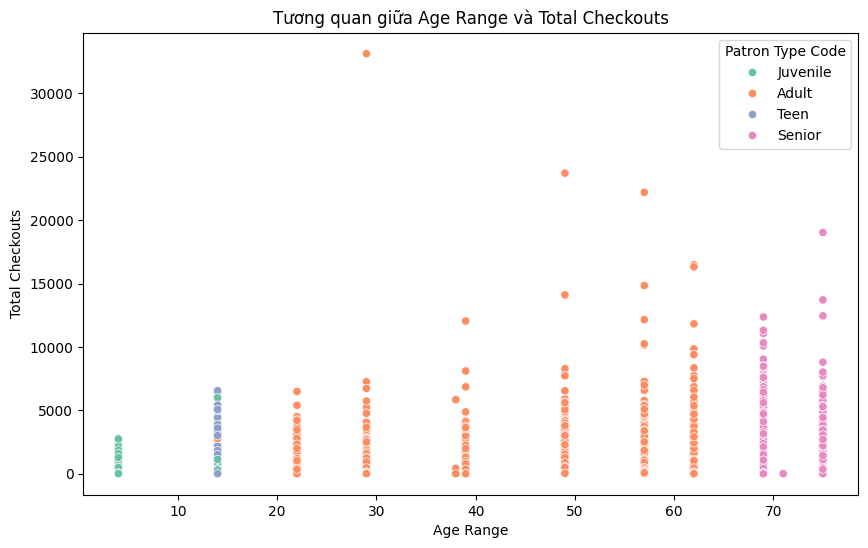

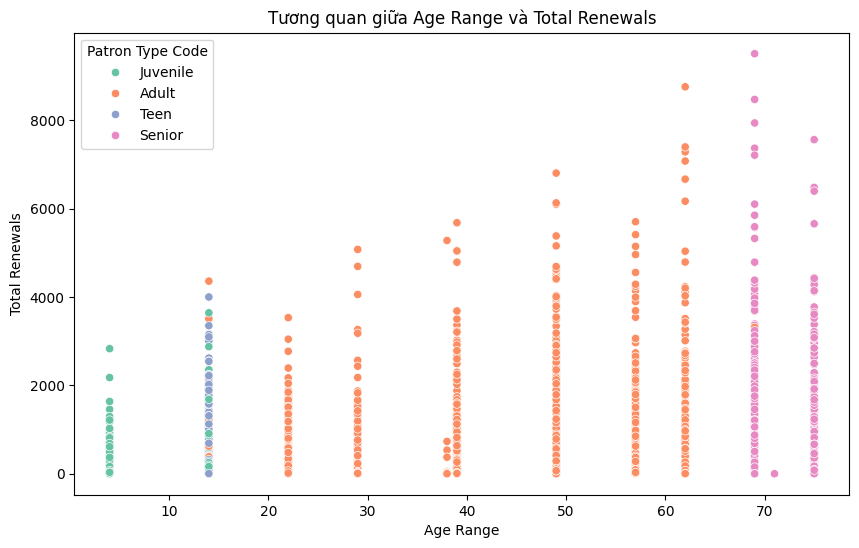

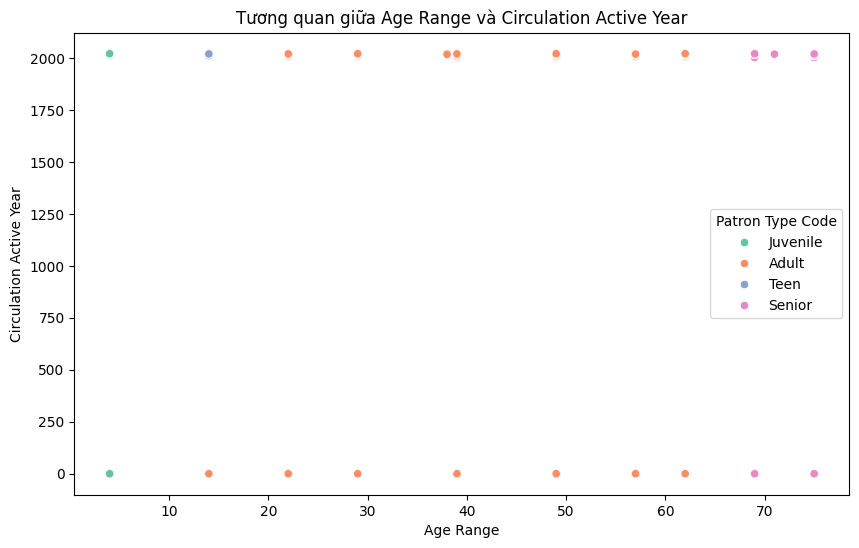

In [ ]:
# Vẽ biểu đồ scatterplot giữa từng cặp cột
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned, x='Age Range', y='Total Checkouts', hue='Patron Type Code', palette='Set2')
plt.title('Tương quan giữa Age Range và Total Checkouts')
plt.xlabel('Age Range')
plt.ylabel('Total Checkouts')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned, x='Age Range', y='Total Renewals', hue='Patron Type Code', palette='Set2')
plt.title('Tương quan giữa Age Range và Total Renewals')
plt.xlabel('Age Range')
plt.ylabel('Total Renewals')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned, x='Age Range', y='Circulation Active Year', hue='Patron Type Code', palette='Set2')
plt.title('Tương quan giữa Age Range và Circulation Active Year')
plt.xlabel('Age Range')
plt.ylabel('Circulation Active Year')
plt.show()


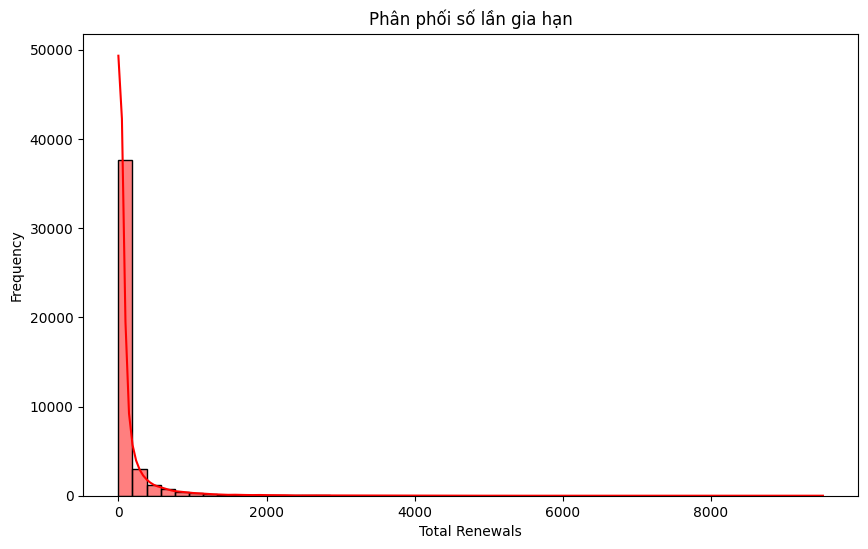

In [ ]:
# Vẽ biểu đồ phân phối số lần gia hạn
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['Total Renewals'], kde=True, color='red', bins=50)
plt.title('Phân phối số lần gia hạn')
plt.xlabel('Total Renewals')
plt.ylabel('Frequency')
plt.show()


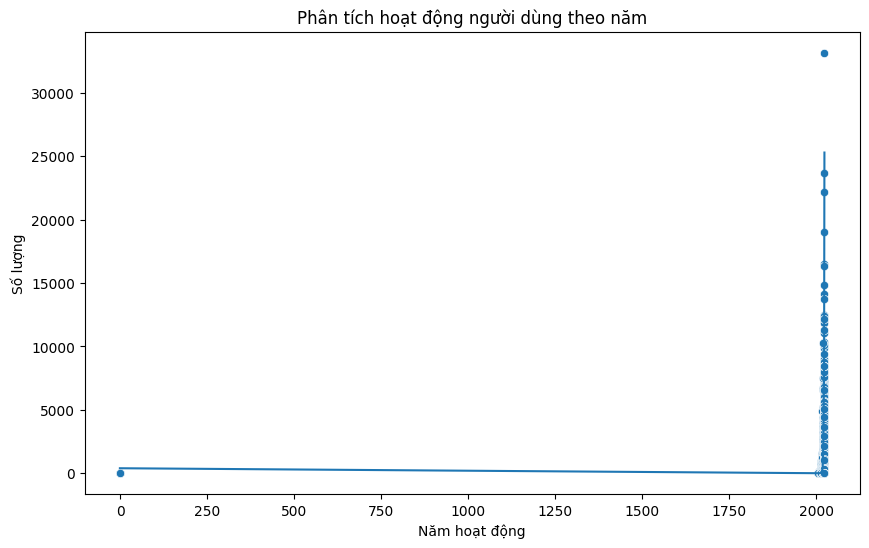

In [ ]:
"# Vẽ biểu đồ phân phối người dùng theo năm hoạt động"
plt.figure(figsize=(10, 6))
sns.lineplot(x='Circulation Active Year', y='count', data=data_cleaned.groupby('Circulation Active Year').size().reset_index(name='count'))
sns.scatterplot(x='Circulation Active Year', y='Total Checkouts', data=data_cleaned)
plt.title('Phân tích hoạt động người dùng theo năm')
plt.xlabel('Năm hoạt động')
plt.ylabel('Số lượng')
plt.show()

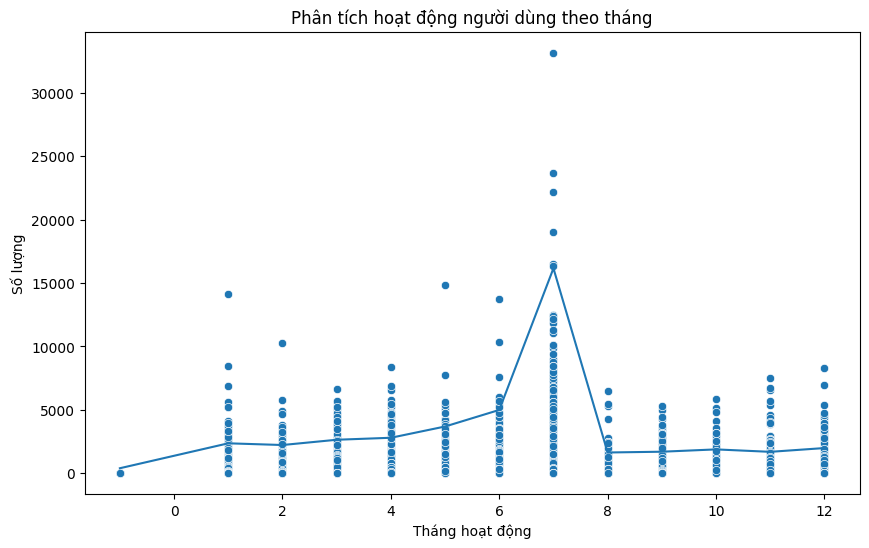

In [ ]:
"# Vẽ biểu đồ phân phối người dùng theo năm hoạt động"
plt.figure(figsize=(10, 6))
sns.lineplot(x='Circulation Active Month', y='count', data=data_cleaned.groupby('Circulation Active Month').size().reset_index(name='count'))
sns.scatterplot(x='Circulation Active Month', y='Total Checkouts', data=data_cleaned)
plt.title('Phân tích hoạt động người dùng theo tháng')
plt.xlabel('Tháng hoạt động')
plt.ylabel('Số lượng')
plt.show()

### To predict patron type effectively, it is crucial to refine the data analysis and visualization process. Instead of relying solely on complex or cluttered distributional plots, the data can be preprocessed to highlight key features, such as total checkouts, renewals, age groups, and home library. Machine learning algorithms, such as decision trees, logistic regression, or classification models, can then be applied to identify patterns and relationships

##**Machine Learning**
### Lastly, We want to know what is the next trend of patron type code based on total checkouts, renewals, age groups, and home library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
# Mã hóa Patron Type Code và các cột phân loại khác
le = LabelEncoder()
data_cleaned['Patron Type Code'] = le.fit_transform(data_cleaned['Patron Type Code'])

# Chia dữ liệu thành training và test set (80% train, 20% test)
# assign the split data to four variables
X = data_cleaned[['Total Checkouts', 'Total Renewals', 'Age Range',
              'Home Library Definition_Chinatown', 'Home Library Definition_Mission',
              'Home Library Definition_Richmond', 'Home Library Definition_Sunset', 'Circulation Active Year', 'Circulation Active Month']]
y = data_cleaned['Patron Type Code']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hàm đánh giá hiệu suất
def evaluate_model(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Nếu là bài toán phân loại nhiều lớp
    try:
        roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')  # ROC-AUC cho nhiều lớp
    except ValueError:
        roc_auc = None  # Khi không thể tính được ROC-AUC
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"**{model_name}**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    else:
        print("ROC-AUC không thể tính được với dữ liệu này.")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n")

In [ ]:
#Model Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Huấn luyện mô hình Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập test
nb_pred = nb_model.predict(X_val)
nb_prob = nb_model.predict_proba(X_val)[:, 1]  # Xác suất cho lớp dương

# Đánh giá hiệu suất mô hình Naive Bayes
evaluate_model(y_val, nb_pred, nb_prob, "Naive Bayes")


**Naive Bayes**
Accuracy: 0.9052
F1-score: 0.9032
ROC-AUC không thể tính được với dữ liệu này.
Confusion Matrix:
[[5391   41   75  120]
 [  20  473    0  473]
 [  83    0 1079    0]
 [  10   15    0 1046]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5627
           1       0.89      0.49      0.63       966
           2       0.94      0.93      0.93      1162
           3       0.64      0.98      0.77      1071

    accuracy                           0.91      8826
   macro avg       0.86      0.84      0.83      8826
weighted avg       0.92      0.91      0.90      8826





In [ ]:
#Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán trên tập test
dt_pred = dt_model.predict(X_val)
dt_prob = dt_model.predict_proba(X_val)[:, 1]  # Xác suất cho lớp dương

# Đánh giá hiệu suất mô hình Decision Tree
evaluate_model(y_val, dt_pred, dt_prob, "Decision Tree")

**Decision Tree**
Accuracy: 0.9049
F1-score: 0.9044
ROC-AUC không thể tính được với dữ liệu này.
Confusion Matrix:
[[5499   23   15   90]
 [  28  679    0  259]
 [   8    0 1154    0]
 [ 106  310    0  655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5627
           1       0.67      0.70      0.69       966
           2       0.99      0.99      0.99      1162
           3       0.65      0.61      0.63      1071

    accuracy                           0.90      8826
   macro avg       0.82      0.82      0.82      8826
weighted avg       0.90      0.90      0.90      8826





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập test
rf_pred = rf_model.predict(X_val)
rf_prob = rf_model.predict_proba(X_val)[:, 1]  # Xác suất cho lớp dương

# Đánh giá hiệu suất mô hình Random Forest
evaluate_model(y_val, rf_pred, rf_prob, "Random Forest")

**Random Forest**
Accuracy: 0.9244
F1-score: 0.9258
ROC-AUC không thể tính được với dữ liệu này.
Confusion Matrix:
[[5490   15   15  107]
 [   5  669    0  292]
 [   0    0 1162    0]
 [  19  214    0  838]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5627
           1       0.74      0.69      0.72       966
           2       0.99      1.00      0.99      1162
           3       0.68      0.78      0.73      1071

    accuracy                           0.92      8826
   macro avg       0.85      0.86      0.86      8826
weighted avg       0.93      0.92      0.93      8826





# Results:
## Naive Bayes Model
Accuracy: 0.9138

F1-score: 0.9115

Input variables: Total Checkouts, Total Renewals,Circulation Active Year,Circulation Active Month, Age Range, Home Library Definitions (one-hot encoded).

##Random Forest:

Accuracy: 0.9210

F1-score: 0.9220

Input variables: Total Checkouts, Total Renewals,Circulation Active Year,Circulation Active Month Age Range, Home Library Definitions (one-hot encoded).

##Decision Tree Model
Accuracy: 0.9086

F1-score: 0.9085

Input variables: Total Checkouts, Total Renewals,Circulation Active Year,Circulation Active Month, Age Range, Home Library Definitions (one-hot encoded).

